In [1]:
import numpy as np
import osmnx as ox
import matplotlib.pyplot as plt
from pyproj import Proj, transform
import os
from pyproj import Geod

In [2]:
file_names = os.listdir("sample_maps_zipped/orto_gif_1km")

image1_lon_lat = file_names[0].replace("_", " ").replace(".", " ").split(" ")
image1_lon_lat = (image1_lon_lat[1], image1_lon_lat[2])
image1_lon_lat[0]

'515000'

In [3]:
# Cell doesn't work rn

est97 = Proj(init='epsg:3301')
wgs84 = Proj(init='epsg:4326')
x, y = transform(wgs84, est97, float(image1_lon_lat[0]), float(image1_lon_lat[1]))
x 

c:\Users\mkuusvek\Anaconda3\envs\its23\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\mkuusvek\Anaconda3\envs\its23\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\mkuusvek\AppData\Local\Temp\ipykernel_16976\2551044574.py:3: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-

inf

In [4]:
lon = 24.2613247
lat = 59.0435867

In [5]:
# Move coordinates to be the center of the image (instead of bottom right)

geod = Geod(ellps="WGS84")
lon, lat, az = geod.fwd(lon, lat, az=0, dist=500) # 500 meters north
lon, lat, az = geod.fwd(lon, lat, az=90, dist=500) # 500 meters east

lon


24.270036235755747

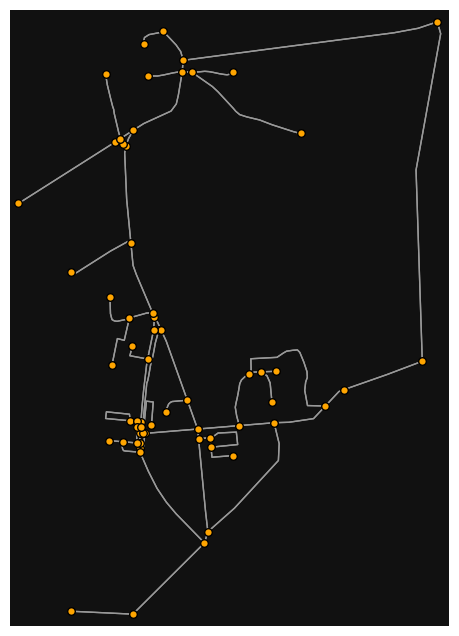

In [6]:
G = ox.graph_from_point((lat, lon), dist=1000, network_type='all')
fig, ax = ox.plot_graph(G, node_color='orange', node_size=30,
node_zorder=2, node_edgecolor='k')

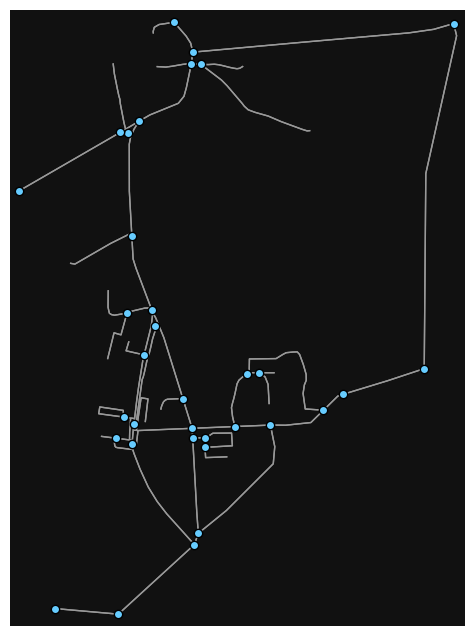

In [7]:
G = ox.project_graph(G)
intersections = ox.consolidate_intersections(G, rebuild_graph=False, dead_ends=False)
points = np.array([point.xy for point in intersections])


fig, ax = ox.plot_graph(G, show=False, close=False, node_alpha=0)
ax.scatter(x=points[:,0], y=points[:,1], zorder=2, color='#66ccff',
edgecolors='k')
plt.show()